In [2]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

df_sampling = pd.read_csv('C:\\Users\\lucia\\Desktop\\DielModels\\reconstruction_results\\MODEL1507180028\\results_troppo\\DielModel\\dfa\\diel_model_sampling.csv')

In [3]:
reactions_data = df_sampling.iloc[:, 1:].values

In [4]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(reactions_data)

tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(reactions_data)

pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
tsne_df = pd.DataFrame(tsne_result, columns=['t-SNE1', 't-SNE2'])

df_transposto = df_sampling.T

In [9]:
df_transposto = df_transposto.iloc[1:]

In [10]:
df_transposto

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
Bc1_Day,0.042313,0.030958,0.031029,0.022435,0.017102,0.015768,0.015521,0.015880,0.015311,0.015036,...,0.015372,0.014537,0.015335,0.016035,0.015801,0.015456,0.015044,0.014571,0.015518,0.016059
Bc2_Day,0.076642,0.056075,0.056204,0.040637,0.030978,0.028561,0.028114,0.028763,0.027734,0.027234,...,0.027845,0.026331,0.027777,0.029045,0.028621,0.027995,0.027249,0.026393,0.028108,0.029088
Bc3_Day,0.243497,0.178156,0.178566,0.129106,0.098419,0.090740,0.089319,0.091383,0.088112,0.086525,...,0.088464,0.083656,0.088250,0.092277,0.090932,0.088943,0.086573,0.083853,0.089302,0.092415
Bc4_Day,0.211563,0.154791,0.155147,0.112174,0.085512,0.078840,0.077605,0.079398,0.076556,0.075178,...,0.076862,0.072685,0.076676,0.080175,0.079007,0.077278,0.075219,0.072855,0.077590,0.080295
Bc5_Day,0.225135,0.164721,0.165100,0.119370,0.090997,0.083897,0.082584,0.084492,0.081468,0.080001,...,0.081793,0.077348,0.081595,0.085318,0.084075,0.082236,0.080044,0.077529,0.082568,0.085446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Starch_p_Night_sp_exchange_reverse,0.103227,1.825335,0.741831,1.475911,2.260017,3.792527,4.614515,6.282745,3.748840,15.910356,...,359.536052,358.929780,369.755574,371.396233,375.355801,379.380268,381.843149,381.807751,392.101889,380.530637
D-Fructose_Night_sp_exchange_reverse,0.368076,2.805408,1.211603,1.962267,4.881883,6.750160,7.585409,8.939377,6.919260,19.002055,...,343.544753,342.840360,355.028089,356.579832,360.606638,364.595795,367.029596,366.323321,374.912521,363.228330
(S)-Malate_c_Night_sp_exchange_reverse,0.103760,1.860792,0.823667,1.416051,3.061051,4.684573,5.532664,7.732386,5.183177,17.423197,...,340.111107,339.539018,350.341964,351.519993,356.573247,360.776599,363.181591,363.005512,373.515852,362.032271
Fumarate_Night_sp_exchange_reverse,0.064895,1.800009,0.685235,1.429255,2.265044,3.747613,1.754549,3.520675,1.329621,13.750728,...,376.167554,375.598570,386.497384,387.951323,392.438030,391.988227,394.505873,394.271592,404.474319,392.688688


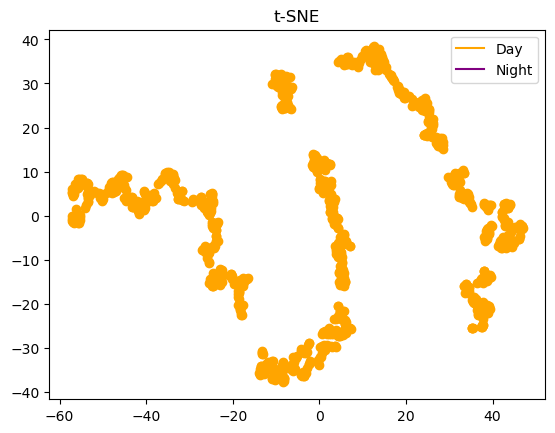

<Figure size 640x480 with 0 Axes>

In [11]:
labels = ['Day' if 'Day' in rxn else 'Night' for rxn in df_transposto.index]

color_map = {'Day': 'orange', 'Night': 'purple'}

for i, row in tsne_df.iterrows():
    category = labels[i]
    color = color_map[category]
    plt.scatter(row['t-SNE1'], row['t-SNE2'], color=color)

plt.legend(handles=[plt.Line2D([], [], color='orange', label='Day'),
                    plt.Line2D([], [], color='purple', label='Night')])

plt.title('t-SNE')
plt.show()
plt.savefig('C:\\Users\\lucia\\Desktop\\DielModels\\PCA + T-SNE\\gráfico_t-sne_df_original.png')

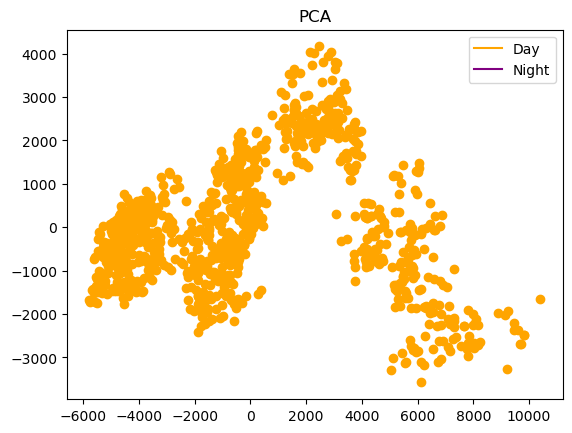

<Figure size 640x480 with 0 Axes>

In [12]:
color_map = {'Day': 'orange', 'Night': 'purple'}

for i, row in pca_df.iterrows():
    category = labels[i]
    color = color_map[category]
    plt.scatter(row['PC1'], row['PC2'], color=color)

plt.legend(handles=[plt.Line2D([], [], color='orange', label='Day'),
                    plt.Line2D([], [], color='purple', label='Night')])

plt.title('PCA')
plt.show()
plt.savefig('C:\\Users\\lucia\\Desktop\\DielModels\\PCA + T-SNE\\gráfico_pca_df_original.png')